<a href="https://colab.research.google.com/github/rahulrajpr/AdvancedHyperParameterOptimisation/blob/ScikitOptimize/ScikitOptimize_BayesSearchCV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- Scikit Opt BayesSearchCV - Optimizes the hyperparamers from the distribution of hyperparameter combinations based on the metric choosen using the probabilty of find the local minima.

- This BayesSearchCV Class is very very similar to the grid search cv or randomized search CV in scikit learn.

- You can run - Gussian Process or Random Forest Process using the BayesSearch CV very similar to Grid Search or Randomised Seacch CV's with small amount code.

Steps

1. Define parameter space as dict
2. Initaite the bayesSearchCV Object
3. Fit the search object
4. Explore the attribiutes in the similar way of grid search or random search

Note

- Grid Search CV - Try all combinations of hyperparameters
- Random Search CV - Try random combinations of hyperparameters
- Bayes Search CV - Try the probalistic combinations of hyperparameters 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.datasets import load_breast_cancer

In [3]:
dataset = load_breast_cancer()
data = dataset.data
columns = dataset.feature_names
df = pd.DataFrame(data = data, columns = columns)
df['target'] = dataset.target
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [4]:
X = df.drop('target', axis =1)
y = df['target']

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train,X_test, y_train,y_test = train_test_split(X,y,train_size = 0.7, random_state = 100, stratify = y)

Define the model object

In [7]:
from xgboost import XGBClassifier

In [8]:
# non-skleran model object
xgb = XGBClassifier(random_state = 100)

Parameter list --

max_depth: int = 3, learning_rate: float = 0.1, n_estimators: int = 100, verbosity: int = 1, silent: Any | None = None, objective: str = "binary:logistic", booster: str = 'gbtree', n_jobs: int = 1, nthread: Any | None = None, gamma: int = 0, min_child_weight: int = 1, max_delta_step: int = 0, subsample: int = 1, colsample_bytree: int = 1, colsample_bylevel: int = 1, colsample_bynode: int = 1, reg_alpha: int = 0, reg_lambda: int = 1, scale_pos_weight: int = 1, base_score: float = 0.5, random_state: int = 0, seed: Any | None = None, missing: Any | None = None, **kwargs: Any) -> None
Implementation of the scikit-learn API for XGBoost classification.

Define the parameter space

In [9]:
!pip install scikit-optimize

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 100 kB 4.8 MB/s 


In [35]:
params_grid = {'n_estimators' : (10,120,'uniform'),
                'max_depth' : (1,8,'uniform'),
               'learning_rate' : (0.001,0.1,'log-uniform'),
               'min_samples_splits' : (0.001,0.999,'log-uniform'),
               'loss' : ['exponential','deviance']
               }

Run the search using the BayesSearchCV

In [36]:
from skopt import BayesSearchCV

In [42]:
search = BayesSearchCV(estimator = xgb,
                       search_spaces = params_grid,
                       optimizer_kwargs= {'base_estimator': 'GP'}, # {'base_estimator': 'RF'} for Random Forest process
                       cv = 5,
                       n_iter = 50,
                       scoring = 'accuracy',
                       n_jobs = -1,
                       verbose = 1,
                       random_state = 100
                       )

In [43]:
search.fit(X_train,y_train)
%time

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

Explore the search results

In [45]:
# best parameters
search.best_params_

OrderedDict([('learning_rate', 0.1),
             ('loss', 'exponential'),
             ('max_depth', 4),
             ('min_samples_splits', 0.999),
             ('n_estimators', 120)])

In [46]:
best_estimator = search.best_estimator_

In [48]:
tmp = pd.DataFrame(search.cv_results_)

In [49]:
sel_cols = ['rank_test_score','param_n_estimators','param_max_depth','param_min_samples_splits','param_learning_rate','param_loss','mean_test_score','std_test_score']

In [51]:
tmp = tmp[sel_cols].sort_values(by = 'mean_test_score', ascending = False).set_index('rank_test_score')
tmp.head()

,param_n_estimators,param_max_depth,param_min_samples_splits,param_learning_rate,param_loss,mean_test_score,std_test_score
rank_test_score,,,,,,,
1,85,4,0.999,0.1,exponential,0.964747,0.016861
1,91,4,0.999,0.1,exponential,0.964747,0.016861
1,84,4,0.999,0.1,exponential,0.964747,0.016861
1,75,4,0.999,0.1,deviance,0.964747,0.016861
1,91,4,0.999,0.1,exponential,0.964747,0.016861


Lets Evaluate the final model

In [53]:
from sklearn.metrics import accuracy_score

In [54]:
print('train accuracy : ',accuracy_score(y_train,best_estimator.predict(X_train)))
print('test accuracy : ',accuracy_score(y_test,best_estimator.predict(X_test)))

train accuracy :  1.0
test accuracy :  0.9824561403508771


Lets examine the hyperparameter ranges

In [55]:
def param_plot(param_name):
  mean = tmp.groupby(param_name)['mean_test_score'].mean()
  std = tmp.groupby(param_name)['mean_test_score'].std()
  mean.plot(yerr = [std,std])
  plt.show()

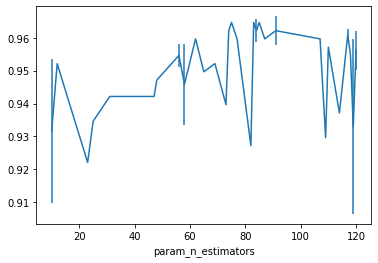

In [56]:
param_plot('param_n_estimators')

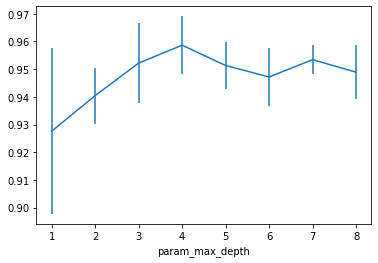

In [57]:
param_plot('param_max_depth')

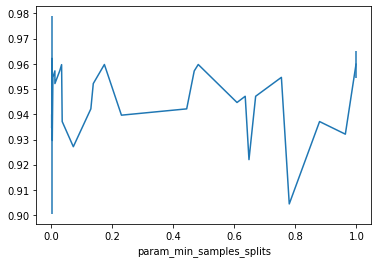

In [58]:
param_plot('param_min_samples_splits')

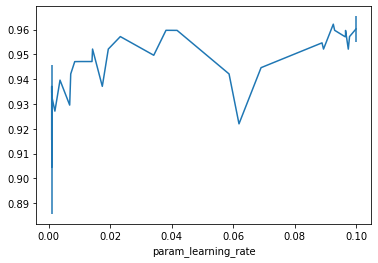

In [59]:
param_plot('param_learning_rate')

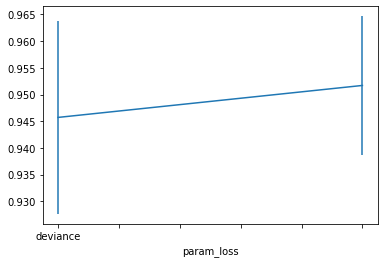

In [60]:
param_plot('param_loss')